In [0]:
# to load the dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# clone the Shallow and Deep Convolutional Networks for Saliency Prediction repo
!git clone https://github.com/imatge-upc/saliency-2016-cvpr.git saliency_cvpr

Cloning into 'saliency_cvpr'...
remote: Enumerating objects: 266, done.
remote: Total 266 (delta 0), reused 0 (delta 0), pack-reused 266
Receiving objects: 100% (266/266), 94.39 MiB | 11.78 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [0]:
# install required packages
!pip install Lasagne Theano==0.9 scipy==1.1.0 nolearn
#!pip install -e git+https://github.com/dnouri/nolearn.git@3fdd21d819#egg=nolearn==0.7.git
!apt install caffe-cuda

In [0]:
# unzip sample videos from drive
!unzip drive/My\ Drive/PFE/001_050_Videos

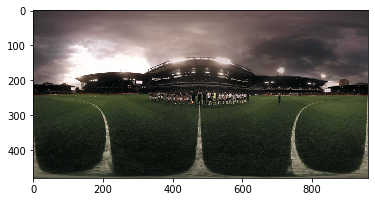

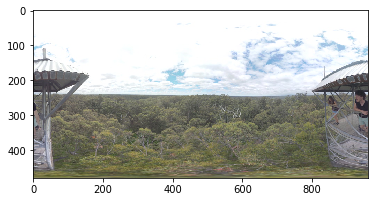

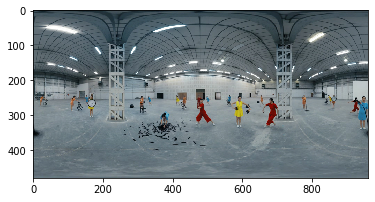

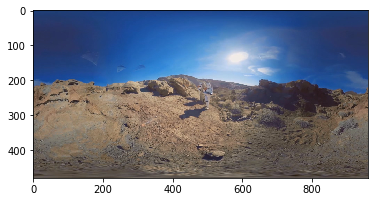

In [4]:
# examples of images from different videos
from matplotlib import pyplot as plt
for i in range(1,5):
  plt.imshow(plt.imread('0'+str(i)+'0/015.jpg'))
  plt.show()

In [0]:
# create the output directory for saliency maps
for i in range(1,5):
  !mkdir 'saliency_output$i'

In [7]:
# download the deep_saliency model
!wget https://imatge.upc.edu/web/sites/default/files/resources/1720/saliency/2016-cvpr/deep_net_model.caffemodel -P saliency_cvpr/deep

--2019-11-20 15:31:33--  https://imatge.upc.edu/web/sites/default/files/resources/1720/saliency/2016-cvpr/deep_net_model.caffemodel
Resolving imatge.upc.edu (imatge.upc.edu)... 147.83.50.75
Connecting to imatge.upc.edu (imatge.upc.edu)|147.83.50.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103226870 (98M)
Saving to: ‘saliency_cvpr/deep/deep_net_model.caffemodel’

deep_net_model.caff 100%[===================>]  98.44M   865KB/s    in 5m 19s  

2019-11-20 15:36:56 (316 KB/s) - ‘saliency_cvpr/deep/deep_net_model.caffemodel’ saved [103226870/103226870]



In [0]:
# modify in the code:
# import cPickle as pickle => import pickle
# from saliency_cvpr.deep.__init__ import SalNet
# from theano.tensor.signal.pool import pool_2d
# from lasagne.objectives import squared_error
# from sklearn.model_selection import KFold
from saliency_cvpr.deep.get_saliency import get_saliency_for_deepnet
get_saliency_for_deepnet('001/', 'saliency_output1/')

In [0]:
!mkdir saliency_output1

In [0]:
# Extract saliency maps for the images shown before
from saliency_cvpr.deep.get_saliency import get_saliency_for_deepnet
for i in range(1,5):
  get_saliency_for_deepnet('0'+str(i)+'0/', 'saliency_output'+str(i)+'/')

In [15]:
#!python3 saliency_cvpr/deep/get_saliency.py

Traceback (most recent call last):
  File "saliency_cvpr/deep/get_saliency.py", line 9, in <module>
    from saliency_cvpr.deep.__init__ import SalNet
ModuleNotFoundError: No module named 'saliency_cvpr'


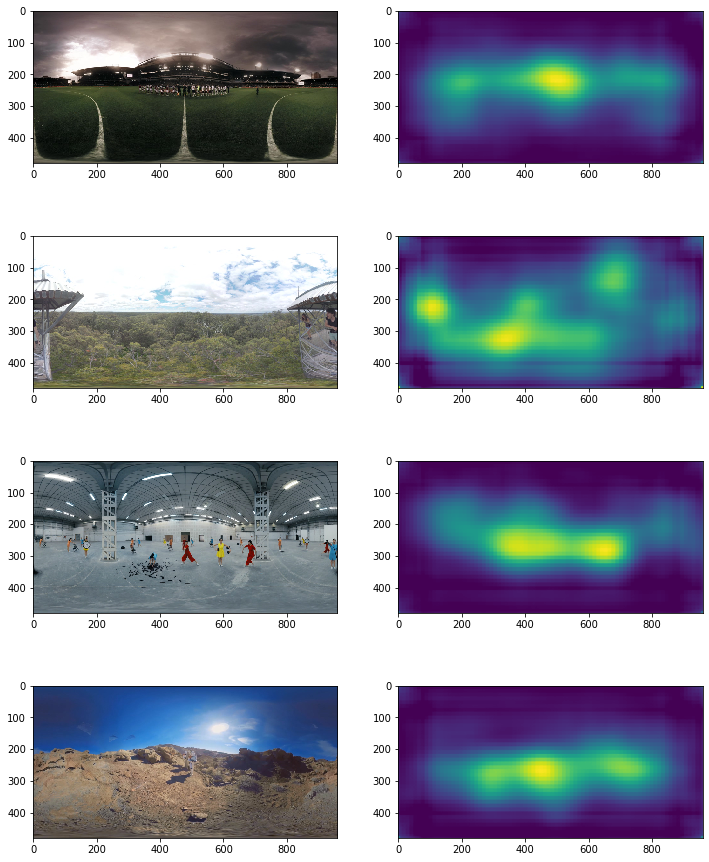

In [45]:
# show the output saliency map for the same images shown before
fig=plt.figure(figsize=(12, 20))
columns = 2
rows = 5
i = 1
while i < rows :
    fig.add_subplot(rows, columns, 2*i-1)
    plt.imshow(plt.imread('0'+str(i)+'0/015.jpg'))
    fig.add_subplot(rows, columns, 2*i)
    plt.imshow(plt.imread('saliency_output'+str(i)+'/015.png'))
    i+=1
plt.show()